# Variance, Correlation, and Grouping
Notebook for checking out ranges and doing various correlation, grouping, and PCA things.

## Imports
Needed Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Load
Getting Datasets

In [3]:
#Load in relevant cleaned datasets
df = pd.read_csv("../data/dataframe.csv").set_index("fips").dropna()
fips = pd.read_csv("../data/fips.csv").set_index("fips")

## Min, Max, Range, Mean, Variance
For getting a look at the min, max, and range, mean, and variance of some of these quantitative variables

### Broadband
Let's get a look at the values of broadband

In [8]:
broadband_max = df["broadband"].max()
broadband_min = df["broadband"].min()
broadband_range = broadband_max - broadband_min
broadband_mean = df["broadband"].mean()
broadband_var = df["broadband"].var()

In [9]:
broadband_max

0.9584921479999999

In [10]:
broadband_min

0.30899998500000003

In [11]:
broadband_range

0.6494921629999999

In [12]:
broadband_mean

0.6653498150671031

In [13]:
broadband_var

0.011156617485237169

As Expected of a value that represents the percentage of households with broadband internet access. These stay between 0 and 1. However, there doesn't seem to be a large amount of variance. So we should also give a look at it's distribution. (See below)

### Unemployment Rate

In [15]:
unemployment_max = df["unemployment_rate"].max()
unemployment_min = df["unemployment_rate"].min()
unemployment_range = unemployment_max - unemployment_min
unemployment_mean = df["unemployment_rate"].mean()
unemployment_var = df["unemployment_rate"].var()

In [16]:
unemployment_max

18.3

In [17]:
unemployment_min

1.4

In [18]:
unemployment_range

16.900000000000002

In [19]:
unemployment_mean

3.989382795011183

In [20]:
unemployment_var

2.071224411002656

Unemployment, also a rate, seems to have a smaller range of values.

### Median House Income

In [29]:
income_max = df["median_house_income"].max()
income_min = df["median_house_income"].min()
income_range = income_max - income_min
income_mean = df["median_house_income"].mean()
income_var = df["median_house_income"].var()

In [22]:
income_max

140382.0

In [23]:
income_min 

25385.0

In [24]:
income_range

114997.0

In [25]:
income_mean

52771.05500479693

In [30]:
income_var

192111376.46082535

We also get roughly expected values for median house income. Albeit, the variance here indicates that some scaling will be required for certain analyses.

### Poverty for all age groups and for people between the ages of 0 and 17

In [31]:
poverty_max = df["poverty_percentage"].max()
poverty_min = df["poverty_percentage"].min()
poverty_range = poverty_max - poverty_min
poverty_mean = df["poverty_percentage"].mean()
poverty_var = df["poverty_percentage"].var()

In [32]:
poverty0_17_max = df["poverty_percentage_0-17"].max()
poverty0_17_min = df["poverty_percentage_0-17"].min()
poverty0_17_range = poverty0_17_max - poverty0_17_min
poverty0_17_mean = df["poverty_percentage_0-17"].mean()
poverty0_17_var = df["poverty_percentage_0-17"].var()

In [33]:
poverty_max

48.4

In [34]:
poverty_min

2.6

In [35]:
poverty_range

45.8

In [36]:
poverty_mean

15.159354013431425

In [37]:
poverty_var

36.93009721532532

In [38]:
poverty0_17_max

68.3

In [39]:
poverty0_17_min

2.5

In [40]:
poverty0_17_range

65.8

In [41]:
poverty0_17_mean

21.107259354013433

In [42]:
poverty0_17_var

78.7263484365526

We'll also need to scale values for percentage of people living in poverty as well as perhaps only using one of these

## Distribution
For looking at classification distributions

### Education
With each education statistic there is limited value to the regression of that statistic to other datapoints. Thus, there are two options to think of in terms of label classification. The first is a simple max classification. Thus, we classify this as 1, 2, 3, or 4 based upon which educational advantage was maxed. The other is a scoring system which multiplies it's percentage by that 1-4 classification to give a score that regression can be performed against.

#### Max Classification
* 1 for highest percentage being below high school
* 2 for highest percentage being high school graduation
* 3 for highest percentage being some college
* 4 for highest percentage being college graduation

In [4]:
def max_classifier(less_high, high, some_coll, coll):
    lst = [less_high, high, some_coll, coll]
    return lst.index(max(lst)) + 1

In [5]:
max_edu_label = df.apply(lambda x: max_classifier(x.perc_less_highschool, x.perc_highschool, x.perc_some_college, x.perc_college), axis=1)

Let's get a visualization of this distribution

In [9]:
max_edu_label_val = max_edu_label.value_counts().to_frame()
max_edu_label_val

,0
2,1821
3,874
4,392
1,40


<AxesSubplot:xlabel='labels'>

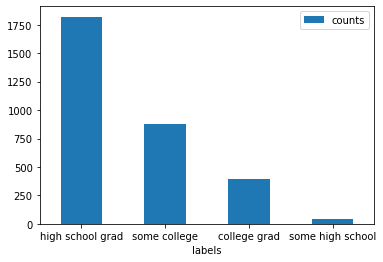

In [13]:
labels = ["high school grad", "some college", "college grad", "some high school"]
barplot_max_edu_label = pd.DataFrame({'labels': labels, 'counts': max_edu_label_val[0]})
barplot_max_edu_label.plot.bar(x='labels', y='counts', rot=0)

This is pretty insightful. And it kinda points to a flaw in turning this into a classification problem as this is not a particularly balanced dataset. Let's see if creating a score does any better.

#### Score Classification
Take the numbers of max classification and sum them multiplied by their percentage

In [15]:
def score_classifier(less_high, high, some_coll, coll):
    return (less_high + (2 * high) + (3 * some_coll) + (4 * coll)) / 100

In [16]:
score_edu_label = df.apply(lambda x: score_classifier(x.perc_less_highschool, x.perc_highschool, x.perc_some_college, x.perc_college), axis=1)

array([[<AxesSubplot:title={'center':'Educational Score Distribution'}>]],
      dtype=object)

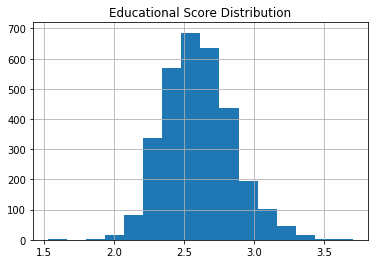

In [19]:
score_edu_frame = pd.DataFrame()
score_edu_frame["Educational Score Distribution"] = score_edu_label
score_edu_frame.hist(bins = 16)

This looks like a fairly normal distribution and we'll probably use this in creation of models and looking for significant statistical relationships. For now let's call this the education score.

### Broadband
We can also take a loot at broadband distributions via histograms

array([[<AxesSubplot:title={'center':'broadband'}>]], dtype=object)

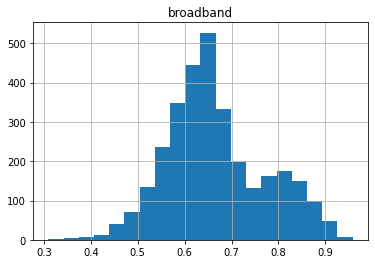

In [20]:
df[["broadband"]].hist(bins=20)

This does seem to be fairly normal with some local maxima at higher percentages but it is overall looking pretty usable

### Urbanization

array([[<AxesSubplot:title={'center':'urbanization_class'}>]],
      dtype=object)

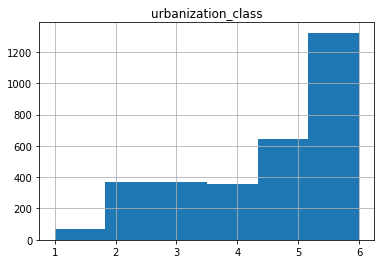

In [21]:
df[["urbanization_class"]].hist(bins=6)

In [22]:
df[["urbanization_class"]].value_counts()

urbanization_class
6.0                   1323
5.0                    641
3.0                    372
2.0                    367
4.0                    357
1.0                     67
dtype: int64

The urbanization classification also presents an interesting problem as it's very much unbalanced and skewed towards there being a larger amount of rural places than urban. We can keep this but it is interesting

### Poverty
Let's see if poverty rate seems more useful via whole population or just of age 0-17

array([[<AxesSubplot:title={'center':'poverty_percentage'}>]],
      dtype=object)

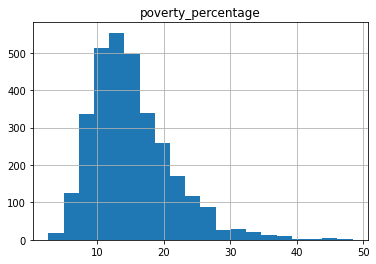

In [23]:
df[["poverty_percentage"]].hist(bins=20)

array([[<AxesSubplot:title={'center':'poverty_percentage_0-17'}>]],
      dtype=object)

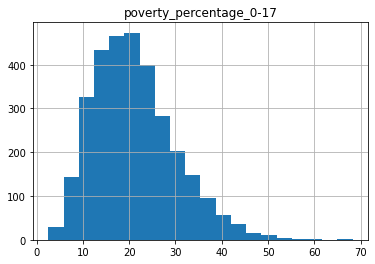

In [24]:
df[["poverty_percentage_0-17"]].hist(bins=20)

There's not much to garner from these. They're both normal distributions. Poverty rates for those 0-17 seem to be more spread out though.

## Correlation
Data correlation matrices

In [25]:
#First Let's make a new set of dataframes for correlation
df_corr = df
df_corr["edu_score"] = score_edu_label

In [27]:
#Create a correlation matrix
corr_matrix = df_corr.corr()
corr_matrix

,broadband,perc_less_highschool,perc_highschool,perc_some_college,perc_college,unemployment_rate,median_house_income,urbanization_class,poverty_percentage,poverty_percentage_0-17,edu_score
broadband,1.000000,-0.477714,-0.512254,0.124391,0.643752,-0.266776,0.667774,-0.601662,-0.534832,-0.577468,0.648179
perc_less_highschool,-0.477714,1.000000,0.249938,-0.485483,-0.596502,0.348893,-0.534972,0.201324,0.657217,0.674333,-0.824389
perc_highschool,-0.512254,0.249938,1.000000,-0.279324,-0.776847,0.252409,-0.537826,0.381327,0.290021,0.353294,-0.724709
perc_some_college,0.124391,-0.485483,-0.279324,1.000000,-0.010950,-0.150285,0.092397,0.071217,-0.321270,-0.297201,0.330765
perc_college,0.643752,-0.596502,-0.776847,-0.010950,1.000000,-0.344441,0.719382,-0.465665,-0.486641,-0.559671,0.925500
unemployment_rate,-0.266776,0.348893,0.252409,-0.150285,-0.344441,1.000000,-0.410773,0.150473,0.519860,0.520675,-0.388772
median_house_income,0.667774,-0.534972,-0.537826,0.092397,0.719382,-0.410773,1.000000,-0.523203,-0.771403,-0.796888,0.714662
urbanization_class,-0.601662,0.201324,0.381327,0.071217,-0.465665,0.150473,-0.523203,1.000000,0.300511,0.313759,-0.397110
poverty_percentage,-0.534832,0.657217,0.290021,-0.321270,-0.486641,0.519860,-0.771403,0.300511,1.000000,0.931039,-0.615327
poverty_percentage_0-17,-0.577468,0.674333,0.353294,-0.297201,-0.559671,0.520675,-0.796888,0.313759,0.931039,1.000000,-0.671086


In [28]:
#See correlation of edu score
corr_matrix["edu_score"]

broadband                  0.648179
perc_less_highschool      -0.824389
perc_highschool           -0.724709
perc_some_college          0.330765
perc_college               0.925500
unemployment_rate         -0.388772
median_house_income        0.714662
urbanization_class        -0.397110
poverty_percentage        -0.615327
poverty_percentage_0-17   -0.671086
edu_score                  1.000000
Name: edu_score, dtype: float64

In [29]:
#See correlation of broadband
corr_matrix["broadband"]

broadband                  1.000000
perc_less_highschool      -0.477714
perc_highschool           -0.512254
perc_some_college          0.124391
perc_college               0.643752
unemployment_rate         -0.266776
median_house_income        0.667774
urbanization_class        -0.601662
poverty_percentage        -0.534832
poverty_percentage_0-17   -0.577468
edu_score                  0.648179
Name: broadband, dtype: float64

We've generally seen some expected correlations that may support the hypothesis that there is an association of internet connectivity and educational performance as well as some other correlations that could be interesting or confounding. We'll need to t-test these but there is a fairly strong correlation between broadband connectivity and education score, on par with other shown statistics. The most interesting statistics to investigate currently with their correlation seem to be median house income and urbanization. 

## Grouping
Designated to make some helpful visualizations based on grouping of data

### Selected Axes
We can pull out some interesting lists and see how they group based on features. We're mainly going to check this out with some of the more interesting correlations with broadband and education which were median house income and urbanization.

In [48]:
#lists
broadband_list = df["broadband"].tolist()
income_list = df["median_house_income"].tolist()
max_edu_class = max_edu_label.tolist()
score_edu_label_list = score_edu_label.tolist()
urbanization_list = df["urbanization_class"].tolist()
colors = ['red','green','blue','purple']
urbanization_colors = ['red','green','blue','purple','black','yellow']

#### Broadband and Median House Income
If we for instance want to see a scatter plot of broadband vs median house income

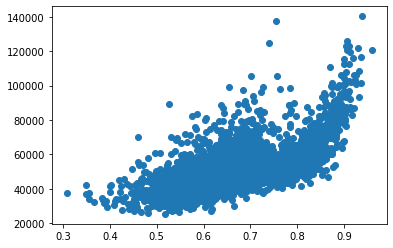

In [34]:
plt.scatter(broadband_list, income_list)

What is ultimately more interesting is the groupings we can see within these scatter plots. Like for instance, broadband vs median house income classified by the max educational attainment percentage.

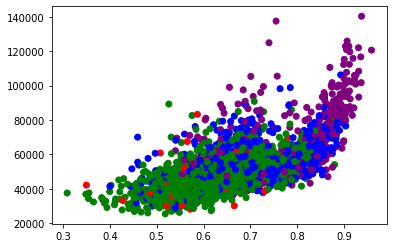

In [49]:
plt.scatter(broadband_list, income_list, c=max_edu_class,cmap=matplotlib.colors.ListedColormap(colors))

With the order of educational attainment going, red then green then blue then purple, there seems to be an indication of a positive relationship between broadband connectivity and median house income and as both increase, the level of educational attainment grows.

#### Broadband and educational attainment score in the context of urbanization
We can also see a scatter of broadband against educational attainment score

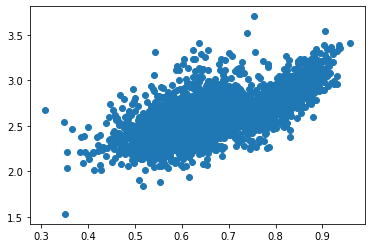

In [50]:
plt.scatter(broadband_list, score_edu_label_list)

It seems to have a fairly interesting relationship. Let's contextualize it with urbanization level.

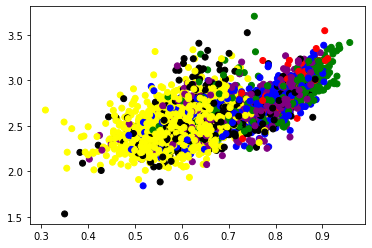

In [51]:
plt.scatter(broadband_list, score_edu_label_list, c=urbanization_list, cmap=matplotlib.colors.ListedColormap(urbanization_colors))

This shows a fair bit of indication that the positive correlation of education score and broadband connectivity seems to correspond with an increase in urbanization perhaps to a point. Interestingly however, the highest tend to be of class 2 which correspond to the 2nd most dense metropolitan areas. I.e. they are not cities. Perhaps the use of one-hot vectors may help with regression analysis and pca.

### Principle Component Analysis
It'll also be interesting to dimensionality reduce the dataset as a whole and see classifications on top of that plot

In [56]:
df_onehot = df[["edu_score", "broadband", "poverty_percentage_0-17", "median_house_income", "unemployment_rate"]]
df_onehot["urban1"] = df.apply(lambda x: 1 if x.urbanization_class == 1 else 0, axis = 1)
df_onehot["urban2"] = df.apply(lambda x: 1 if x.urbanization_class == 2 else 0, axis = 1)
df_onehot["urban3"] = df.apply(lambda x: 1 if x.urbanization_class == 3 else 0, axis = 1)
df_onehot["urban4"] = df.apply(lambda x: 1 if x.urbanization_class == 4 else 0, axis = 1)
df_onehot["urban5"] = df.apply(lambda x: 1 if x.urbanization_class == 5 else 0, axis = 1)
df_onehot["urban6"] = df.apply(lambda x: 1 if x.urbanization_class == 6 else 0, axis = 1)
df_onehot.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,edu_score,broadband,poverty_percentage_0-17,median_house_income,unemployment_rate,urban1,urban2,urban3,urban4,urban5,urban6
fips,,,,,,,,,,,
1001,2.725,0.703591,19.3,59338.0,2.7,0,0,1,0,0,0
1003,2.840,0.771106,13.9,57588.0,2.7,0,0,0,1,0,0
1005,2.225,0.541496,43.9,34382.0,3.8,0,0,0,0,0,1
1007,2.306,0.633871,27.8,46064.0,3.1,0,1,0,0,0,0
1009,2.387,0.635847,18.0,50412.0,2.7,0,1,0,0,0,0


In [57]:
#Saving this notebook real quick
df_onehot.to_csv("../data/dataframe_onehot.csv", index=True)

Let's now turn this into a numpy array, scale it, and perform PCA

In [58]:
df_as_np = df_onehot.to_numpy()

In [63]:
#data scaling
scaler = StandardScaler().fit(df_as_np)
X_scaled = scaler.fit_transform(df_as_np)

array([[ 0.49523668,  0.36210401, -0.20371822, ..., -0.35899981,
        -0.50778335, -0.85637042],
       [ 0.96736362,  1.0014006 , -0.81241802, ...,  2.78551676,
        -0.50778335, -0.85637042],
       [-1.55748914, -1.17277129,  2.56924754, ..., -0.35899981,
        -0.50778335,  1.16771899],
       ...,
       [ 0.00668793,  0.53156963, -1.01531796, ..., -0.35899981,
         1.96934383, -0.85637042],
       [ 0.39670584,  0.35627552, -0.56442922, ..., -0.35899981,
        -0.50778335,  1.16771899],
       [ 0.31459681, -0.05441226, -0.56442922, ..., -0.35899981,
        -0.50778335,  1.16771899]])

In [62]:
#PCA
pca = PCA(n_components=2).fit(X_scaled)

We can view some quantitative things such as explained variance ratio

In [64]:
pca.explained_variance_

array([3.78602244, 1.42257638])

In [65]:
pca.explained_variance_ratio_

array([0.34407379, 0.12928377])

In [75]:
pca.components_

array([[ 0.4255136 ,  0.42626446, -0.42964192,  0.4626993 , -0.27402393,
         0.09860711,  0.25027825,  0.09814306,  0.06896979, -0.03113189,
        -0.27521665],
       [-0.05517746,  0.10267618,  0.14760235, -0.11299398,  0.2166282 ,
         0.01755867, -0.14811891,  0.16924054,  0.19094876,  0.62514512,
        -0.653279  ]])

We have a fairly low explained variance ratio here which does indicate to some extent that we're going to want to factor in most of these features during regression. Our main goal however is to see a plot of the fit transform of the data on 2 principal components

In [72]:
X_2 = pca.fit_transform(X_scaled)

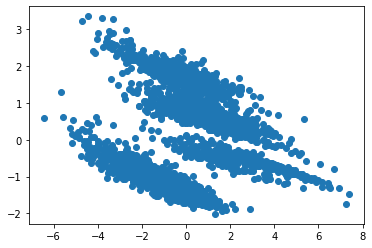

In [73]:
plt.scatter(X_2[:, 0], X_2[:, 1])

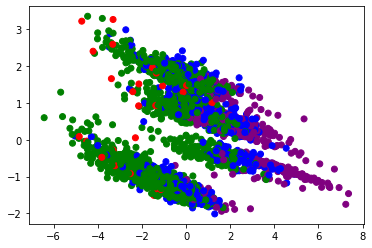

In [74]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=max_edu_class,cmap=matplotlib.colors.ListedColormap(colors))

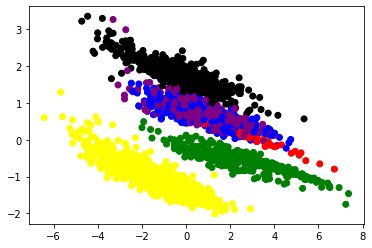

In [76]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=urbanization_list, cmap=matplotlib.colors.ListedColormap(urbanization_colors))

A fairly interesting thing to see in the end. The principal components vary in ways that don't account for a large amount of the data variance but still the direction of the first principal component shows a positive correlation to educational attainment while the direction of the second shows negative correlation to educational attainment.